# "Quick look" plots (SAMI)
---
Use `spaxelsleuth` to make nice summary plots for a given galaxy. 

In [1]:
from spaxelsleuth import load_user_config
load_user_config("/home/u5708159/.spaxelsleuthconfig.json")

In [2]:
# Imports
from spaxelsleuth.loaddata.sami import load_sami_df, load_sami_metadata_df
from spaxelsleuth.plotting.plot2dmap import plot2dmap
from spaxelsleuth.plotting.sdssimg import plot_sdss_image
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram
from spaxelsleuth.plotting.plotgalaxies import plot2dscatter, plot2dhistcontours

from matplotlib import rc, rcParams
import matplotlib.pyplot as plt

rc("text", usetex=False)
rc("font",**{"family": "serif", "size": 12})
rcParams["savefig.bbox"] = "tight"
rcParams["savefig.format"] = "pdf"
plt.ion()
plt.close("all")


utils.py (148) _init_num_threads(): INFO: Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
utils.py (160) _init_num_threads(): INFO: NumExpr defaulting to 8 threads.


In [3]:
# Options
savefigs = True
bin_type = "default"    # Options: "default" or "adaptive" for Voronoi binning
ncomponents = "recom"   # Options: "1" or "recom"
eline_SNR_min = 5       # Minimum S/N of emission lines to accept

In [4]:
# Load metadata
df_metadata = load_sami_metadata_df()

In [5]:
# Load the SAMI sample
df = load_sami_df(ncomponents=ncomponents,
                  bin_type=bin_type,
                  eline_SNR_min=eline_SNR_min,
                  correct_extinction=True,
                  debug=True)

sami.py (1493) load_sami_df(): INFO: Loading DataFrame from file /data/misfit/u5708159/SAMI/sami_default_recom-comp_extcorr_minSNR=5_DEBUG.hd5 [last modified 2023-08-25 15:57:49.046198]...


sami.py (1521) load_sami_df(): INFO: finished!


In [6]:
# Select a galaxy
# gal = 41144
gal = 572402
# gal = 93807
# gal = 209807
assert gal in df["ID"].values, f"{gal} not found in DataFrame!"

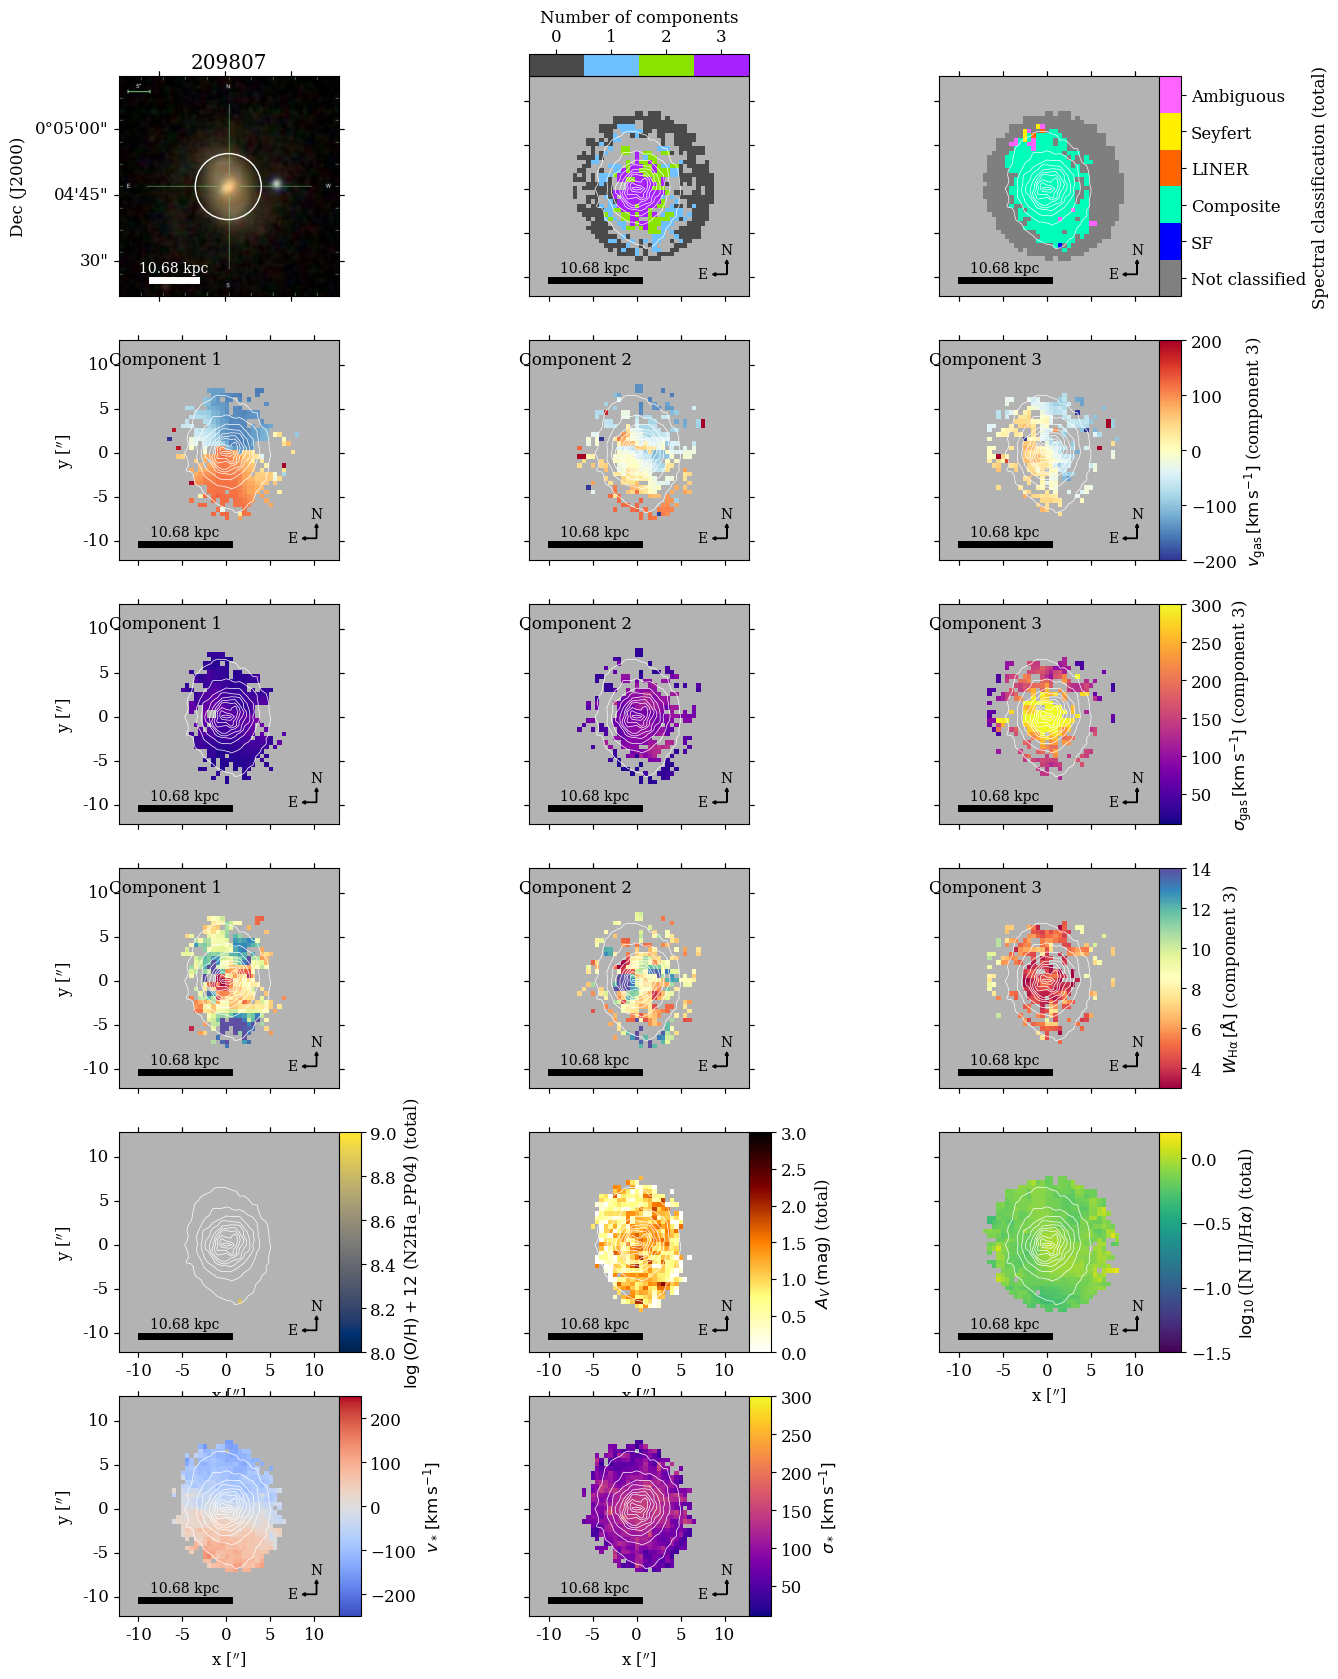

In [9]:
# Create a collage figure displaying various quantities of interest for 
# this galaxy
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
fig.subplots_adjust(wspace=0.2, hspace=0.2)
axs.flat[-1].set_visible(False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# SDSS image 
ax = plot_sdss_image(df=df, gal=gal, ax=axs[0][0])
if ax is not None:
    ax.set_title(f"{gal}")
    lon = ax.coords[0]
    lon.set_ticklabel_visible(False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# Number of components
_, ax = plot2dmap(df=df, gal=gal,
          col_z="Number of components",
          ax=axs[0][1], 
          plot_colorbar=True, cax=None, cax_orientation="horizontal", 
          show_title=False)
lon = ax.coords[0]
lon.set_ticklabel_visible(False)
lat = ax.coords[1]
lat.set_ticklabel_visible(False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# BPT classifications 
_, ax = plot2dmap(df=df, gal=gal,
          col_z="BPT (numeric) (total)",
          ax=axs[0][2], 
          plot_colorbar=True, cax=None, cax_orientation="vertical", 
          show_title=False)
lon = ax.coords[0]
lon.set_ticklabel_visible(False)
lat = ax.coords[1]
lat.set_ticklabel_visible(False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# v_gas
for nn in range(3):
    _, ax = plot2dmap(df=df, gal=gal,
              col_z=f"v_gas (component {nn + 1})",
              ax=axs[1][nn], 
              plot_colorbar=True if nn == 2 else False, cax=None, cax_orientation="vertical", 
              vmin=-200, vmax=+200,
              show_title=False)
    ax.text(s=f"Component {nn + 1}", x=0.15, y=0.95, transform=axs[1][nn].transAxes, verticalalignment="top")
    if nn > 0:
        lat = ax.coords[1]
        lat.set_ticklabel_visible(False)
    lon = ax.coords[0]
    lon.set_ticklabel_visible(False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# sigma_gas
for nn in range(3):
    _, ax = plot2dmap(df=df, gal=gal,
              col_z=f"sigma_gas (component {nn + 1})",
              ax=axs[2][nn], 
              plot_colorbar=True if nn == 2 else False, cax=None, cax_orientation="vertical", 
              vmin=10, vmax=300,
              show_title=False)
    ax.text(s=f"Component {nn + 1}", x=0.15, y=0.95, transform=axs[2][nn].transAxes, verticalalignment="top")
    if nn > 0:
        lat = ax.coords[1]
        lat.set_ticklabel_visible(False)
    lon = ax.coords[0]
    lon.set_ticklabel_visible(False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# EW 
for nn in range(3):
    _, ax = plot2dmap(df=df, gal=gal,
              col_z=f"HALPHA EW (component {nn + 1})",
              ax=axs[3][nn], 
              plot_colorbar=True if nn == 2 else False, cax=None, cax_orientation="vertical", 
              show_title=False)
    ax.text(s=f"Component {nn + 1}", x=0.15, y=0.95, transform=axs[3][nn].transAxes, verticalalignment="top")
    if nn > 0:
        lat = ax.coords[1]
        lat.set_ticklabel_visible(False)
    lon = ax.coords[0]
    lon.set_ticklabel_visible(False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# Metallicity
_, ax = plot2dmap(df=df, gal=gal,
          col_z="log(O/H) + 12 (N2Ha_PP04) (total)",
          vmin=8, vmax=9,
          ax=axs[4][0], 
          plot_colorbar=True, cax=None, cax_orientation="vertical", 
          show_title=False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# A_V
_, ax = plot2dmap(df=df, gal=gal,
          col_z="A_V (total)",
          ax=axs[4][1], 
          plot_colorbar=True, cax=None, cax_orientation="vertical", 
          show_title=False)
lat = ax.coords[1]
lat.set_ticklabel_visible(False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# N2
_, ax = plot2dmap(df=df, gal=gal,
          col_z="log N2 (total)",
          ax=axs[4][2], 
          plot_colorbar=True, cax=None, cax_orientation="vertical", 
          show_title=False)
lat = ax.coords[1]
lat.set_ticklabel_visible(False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# Stellar velocity
_, ax = plot2dmap(df=df, gal=gal,
          col_z="v_*",
          ax=axs[5][0], 
          plot_colorbar=True, cax=None, cax_orientation="vertical", 
          show_title=False)

#///////////////////////////////////////////////////////////////////////////////////////////////////////
# Stellar velocity dispersion
_, ax = plot2dmap(df=df, gal=gal,
          col_z="sigma_*",
          ax=axs[5][1], 
          plot_colorbar=True, cax=None, cax_orientation="vertical", 
          show_title=False)
lat = ax.coords[1]
lat.set_ticklabel_visible(False) 
        

[None, None, None]

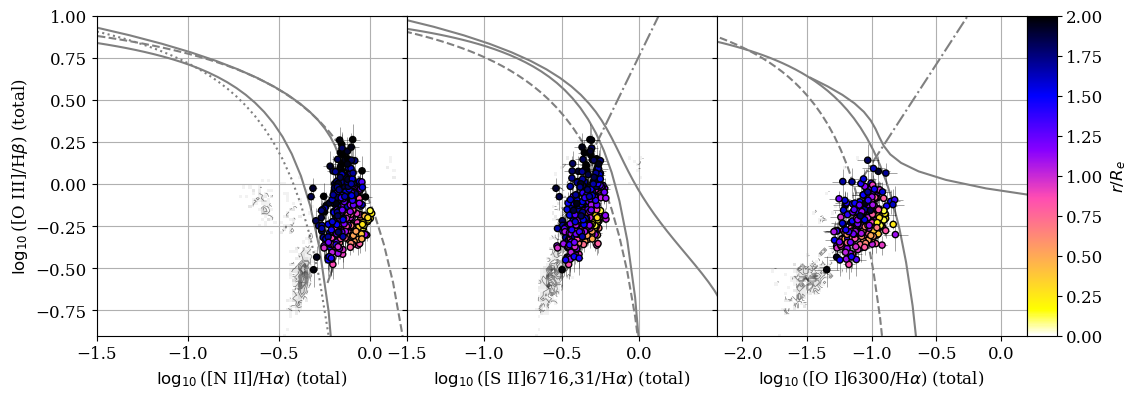

In [8]:
# Optical diagnostic (i.e. BPT) diagram
fig, axs, cax = plot_empty_BPT_diagram(colorbar=True, nrows=1, include_Law2021=True, figsize=(12, 4))
markers = ["o", ">", "D"]
col_z = "r/R_e"
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Plot full SAMI sample
    plot2dhistcontours(df=df,
                       col_x=f"{col_x} (total)",
                       col_y=f"log O3 (total)", col_z="count", log_z=True,
                       alpha=0.5, cmap="gray_r",
                       ax=axs[cc], plot_colorbar=False)

    # Plot measurements for this galaxy
    plot2dscatter(df=df, gal=gal,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z=col_z,
                  cax=cax,
                  marker="o", ax=axs[cc], 
                  markersize=20, 
                  markeredgecolor="black",
                  plot_colorbar=True if cc == 2 else False)

# Decorations
[ax.grid() for ax in axs]
[ax.set_ylabel("") for ax in axs[1:]]
[ax.set_yticklabels([]) for ax in axs[1:]]
[ax.set_xticks(ax.get_xticks()[:-1]) for ax in axs[:-1]]
[ax.collections[0].set_rasterized(True) for ax in axs]
